## PROJECT - LOAN DEFAULT PREDICTION

## Data Loading

In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Load the Dataset

In [2]:
data = pd.read_csv('../data/Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


#### Basic Information

In [3]:
# Basic Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
print(data.describe())

                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000  

In [5]:
print(data.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [6]:
# Check Target Variable
data['Default'].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

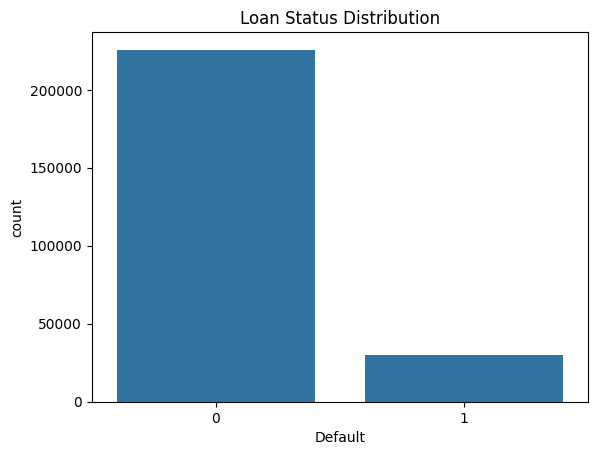

In [8]:
# Target Balance

sns.countplot(x='Default', data=data)
plt.title('Loan Status Distribution')
plt.show()

## Data Cleaning & Preprocessing

In [9]:
data = data.drop(columns = ['LoanID'])

In [10]:
# Convert Binary Columns to 0/1
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0}) 

In [11]:
# One-Hot Encode Categorical Columns
df = pd.get_dummies(data, columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], drop_first = False)

In [12]:
df.columns.shape

(29,)

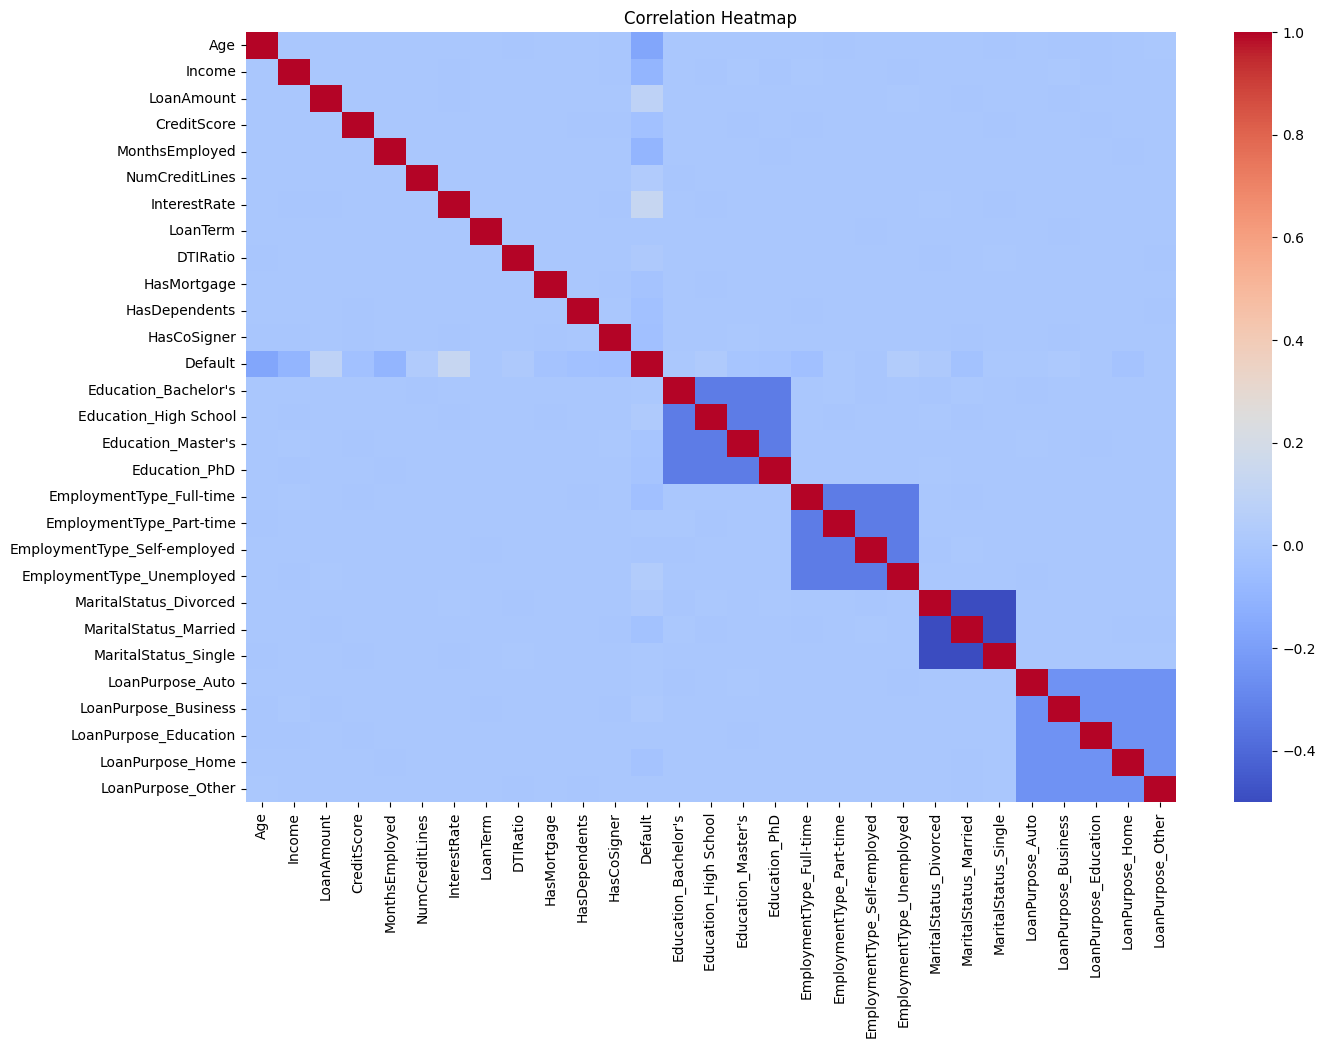

In [13]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering & Train-Test Split

In [14]:
# Features and Target

X = df.drop('Default', axis=1)
y = df['Default']

In [15]:
# import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # keeps same default/no-default ratio in both sets
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target balance in train set:\n", y_train.value_counts(normalize=True))

Train shape: (204277, 28)
Test shape: (51070, 28)
Target balance in train set:
 Default
0    0.883873
1    0.116127
Name: proportion, dtype: float64


In [17]:
# feature scaling

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

### Logistic Regression

In [18]:
# import

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [19]:
# train

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [20]:
# predict

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # for ROC

In [21]:
# evaluate

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[30392 14747]
 [ 1781  4150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.79     45139
           1       0.22      0.70      0.33      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070

ROC-AUC Score: 0.7531825270090895


In [22]:
import joblib

# Save the trained model
joblib.dump(logreg, '../app/model.pkl')

['../app/model.pkl']

In [23]:
print(X.columns.tolist())

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', "Education_Bachelor's", 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']


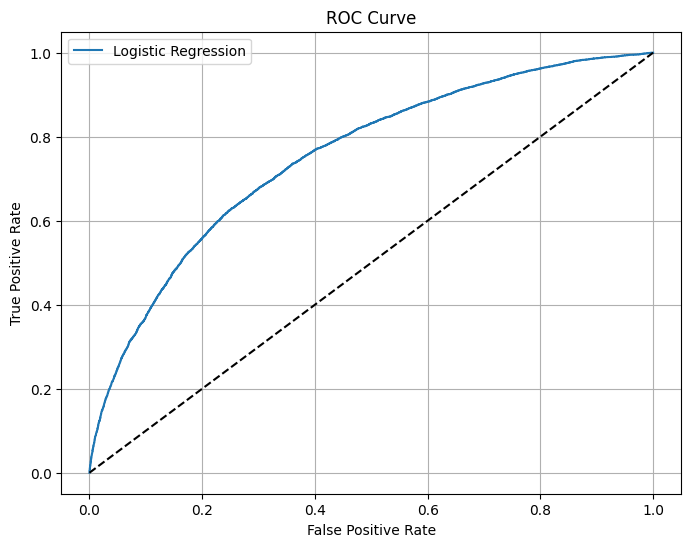

In [24]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


### Random Forest

In [25]:
# import 

from sklearn.ensemble import RandomForestClassifier

In [26]:
# train

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# predict

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [28]:
# Evaluate

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[45102    37]
 [ 5840    91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.71      0.02      0.03      5931

    accuracy                           0.88     51070
   macro avg       0.80      0.51      0.48     51070
weighted avg       0.87      0.88      0.83     51070

ROC-AUC Score: 0.7390321708053673


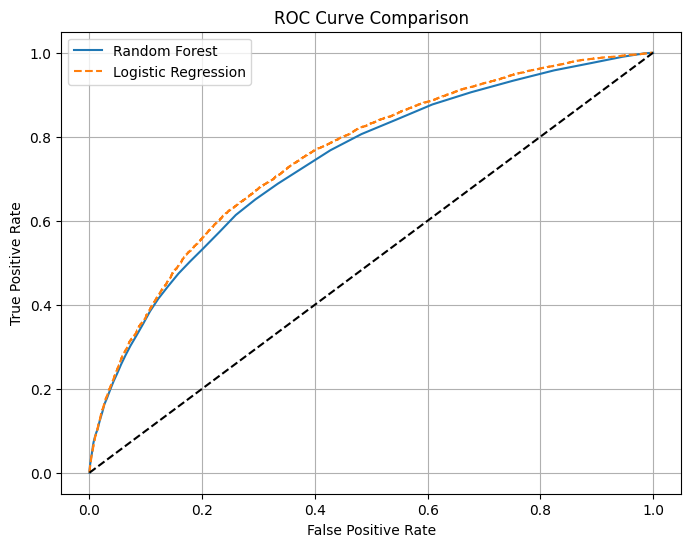

In [29]:
# ROC Curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr, tpr, label='Logistic Regression', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


### XGBoost

In [30]:
# import

from xgboost import XGBClassifier

In [31]:
# train

# calculate scale_pos_weight = (number of class 0) / (number of class 1)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=scale_weight,
                    random_state=42)

xgb.fit(X_train_scaled, y_train)

C:\Users\nishu\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [22:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [32]:
# predict

y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [33]:
# evaluate

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Confusion Matrix:
 [[32823 12316]
 [ 2243  3688]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82     45139
           1       0.23      0.62      0.34      5931

    accuracy                           0.71     51070
   macro avg       0.58      0.67      0.58     51070
weighted avg       0.85      0.71      0.76     51070

ROC-AUC Score: 0.7409321301766358


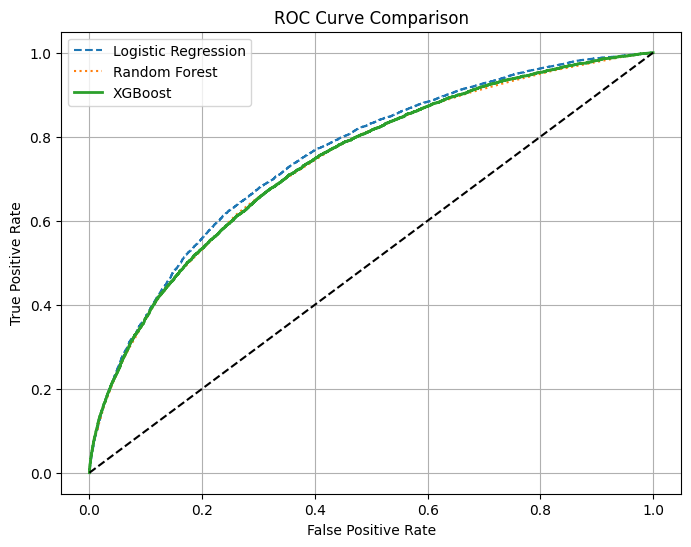

In [34]:
# ROC Curve

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', linestyle=':')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.savefig('../images/ROC_Curve_Comparison.png')
plt.show()


## Feature Importance Plot

<Figure size 1200x600 with 0 Axes>

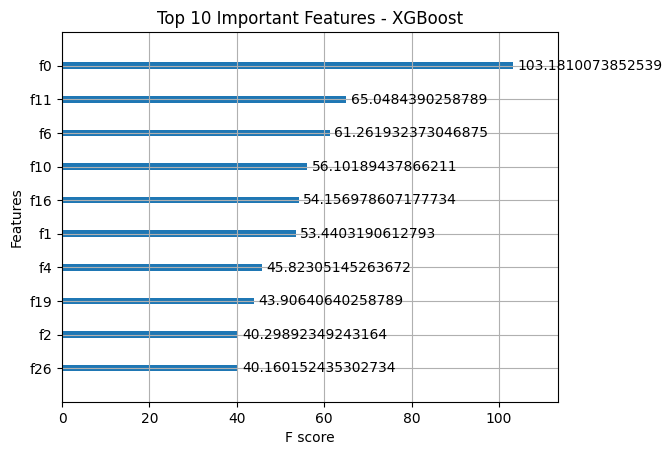

In [35]:
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(xgb, max_num_features=10, importance_type='gain')
plt.title('Top 10 Important Features - XGBoost')
plt.show()

## Conclusion

In this project, we built and evaluated machine learning models to predict the likelihood of a loan default based on applicant information.

- We explored the dataset and addressed an imbalanced classification problem.
- Three models were tested: Logistic Regression, Random Forest, and XGBoost.
- Logistic Regression performed best overall with:
  - Recall (default class): 0.70
  - ROC-AUC Score: 0.75

📌 Key Takeaways:

- Logistic Regression achieved the best balance between detecting loan defaulters and avoiding false positives.
- Random Forest overfitted to the majority class and failed to capture defaulters effectively.
- XGBoost showed better class 1 recall than Random Forest but was still outperformed by Logistic Regression.

This model can be used as a decision support tool for financial institutions to identify high-risk borrowers and reduce potential defaults, helping mitigate financial risk proactively.